In [1]:
import pandahouse as ph
import pandas as pd 
import seaborn as sns

In [2]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [3]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
    SELECT neighbourhood_cleansed, experiences_offered, count(*) as experiences_count
    FROM 
        ldn_listings 
    WHERE experiences_offered != 'none'
    GROUP BY 
    neighbourhood_cleansed, experiences_offered
    ORDER BY 
    experiences_count DESC 
    LIMIT 100
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
experiences = ph.read_clickhouse(query=q, connection=connection_default)
experiences

,neighbourhood_cleansed,experiences_offered,experiences_count
0,Hackney,family,61
1,Tower Hamlets,business,58
2,Westminster,business,50
3,Hackney,social,49
4,Hammersmith and Fulham,business,48
...,...,...,...
95,Redbridge,social,2
96,Barking and Dagenham,social,2
97,Newham,romantic,1
98,Bexley,business,1


In [7]:
experienc = experiences.pivot(index='neighbourhood_cleansed', columns='experiences_offered', values='experiences_count')
experienc

experiences_offered,business,family,romantic,social
neighbourhood_cleansed,,,,
Barking and Dagenham,NaN,NaN,NaN,2.0
Barnet,7.0,7.0,3.0,5.0
Bexley,1.0,NaN,NaN,NaN
Brent,9.0,21.0,5.0,6.0
Bromley,3.0,2.0,NaN,4.0
Camden,36.0,30.0,19.0,25.0
City of London,7.0,1.0,NaN,NaN
Croydon,2.0,3.0,NaN,4.0
Ealing,6.0,13.0,NaN,5.0


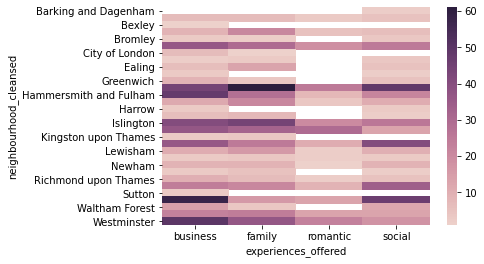

In [8]:

sns.heatmap(experienc, cmap=sns.cubehelix_palette(as_cmap=True))
